In [1]:
import numpy as np
import pynbody as pn
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from punkt import sph_interpolator, create_grid_2d, create_grid_3d

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
ds = pn.load('/Users/Mauro/Desktop/snapshot_344_128.hdf5')

boxsize = 15000
nx = 100
NN = 32

pos    = ds.gas['pos'][::10]
masses = ds.gas['mass'][::10]

Interpolator = sph_interpolator(pos, masses, boxsize, NN)

/usr/local/anaconda3/envs/venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:635: RuntimeWarning: No unit information found in GadgetHDF file. Using gadget default units.
  warnings.warn("No unit information found in GadgetHDF file. Using gadget default units.", RuntimeWarning)
/usr/local/anaconda3/envs/venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


Init: 	 computing 3d hsm and ρ


In [3]:
grad_rho = Interpolator.compute_grad_scalar(Interpolator.rho)
print(grad_rho.shape)

(203059, 3)


In [10]:
grid_3d = create_grid_3d(nx, nx, nx, boxsize)
grad_rho_grid  = Interpolator.query_field_at_positions(grad_rho, grid_3d)
grad_rho_grid  = grad_rho_grid.reshape((nx, nx, nx, 3))

Query: 	 querying values at coordinates
(1000000, 32, 3) (1000000, 32, 1) (1000000, 32, 1) (1000000, 32, 1)


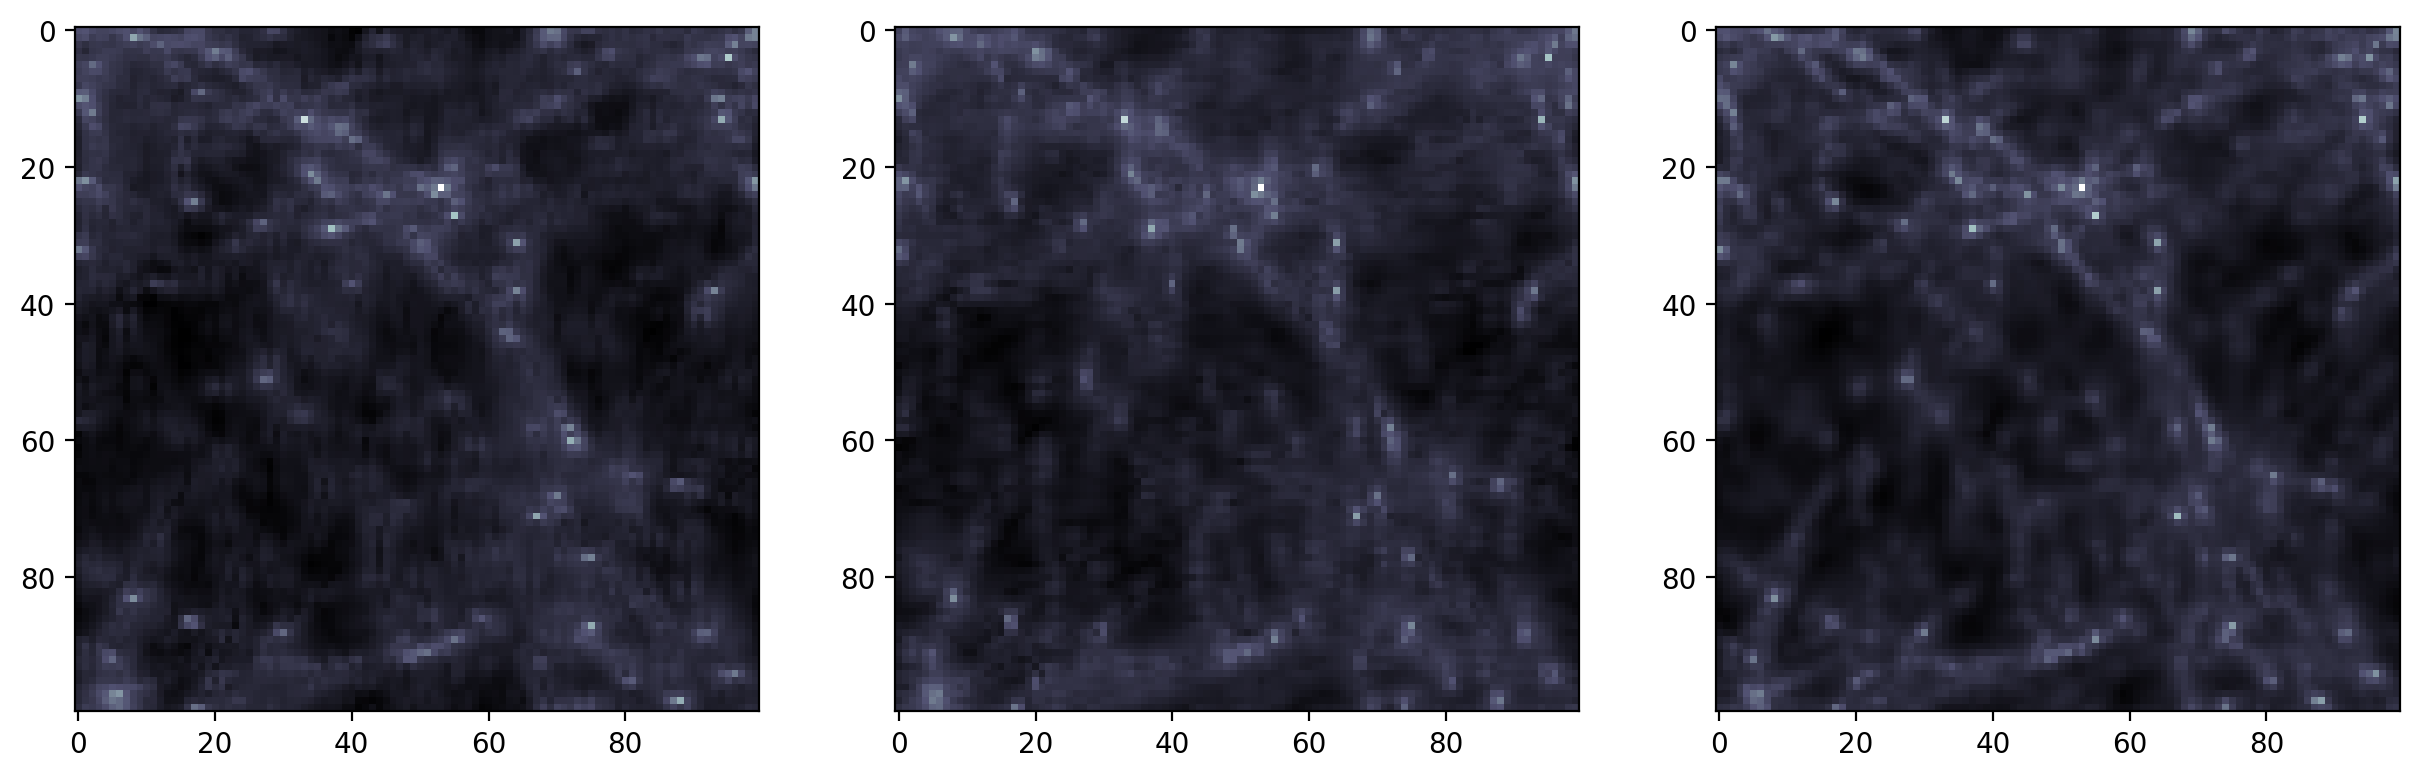

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(np.rot90(np.log10(np.abs(grad_rho_grid[...,0]).mean(-1))), cmap='bone')
ax[1].imshow(np.rot90(np.log10(np.abs(grad_rho_grid[...,1]).mean(-1))), cmap='bone')
ax[2].imshow(np.rot90(np.log10(np.abs(grad_rho_grid[...,2]).mean(-1))), cmap='bone')
plt.show()

In [8]:
grid_3d = create_grid_3d(nx, nx, nx, boxsize)

ρ       = Interpolator.rho
ρ_grid  = Interpolator.query_field_at_positions(ρ, 
                                                grid_3d)
ρ_grid  = ρ_grid.reshape((nx, nx, nx))

Query: 	 querying values at coordinates
(1000000, 32) (1000000, 32) (1000000, 32) (1000000, 32)


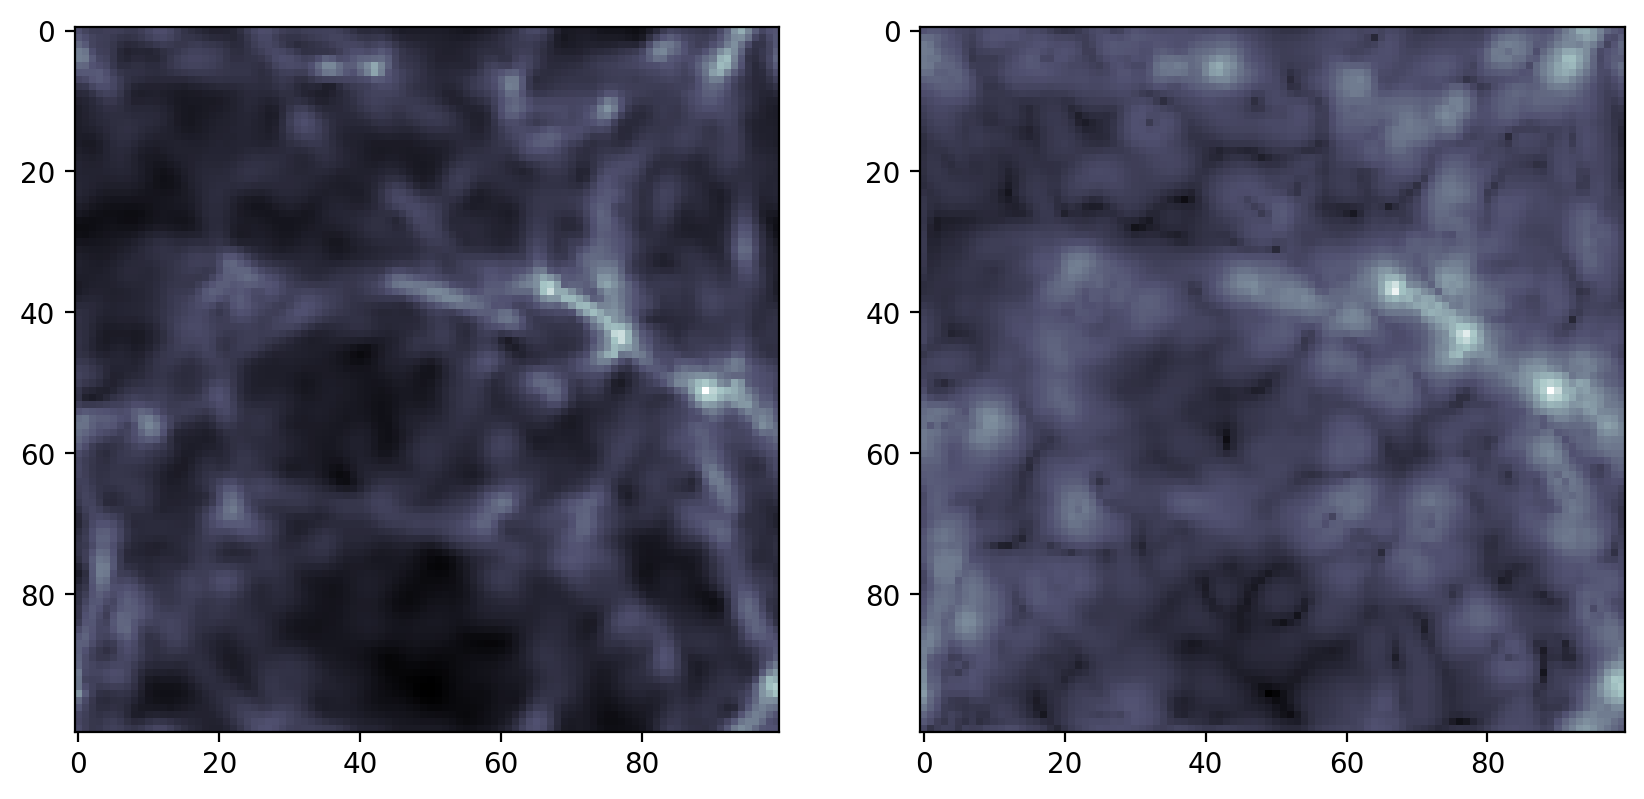

In [31]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(np.rot90(np.log10(ρ_grid[0])), cmap='bone')
ax[1].imshow(np.rot90(np.log10(np.linalg.norm(grad_rho_grid, axis=-1)[0])), cmap='bone')
plt.show()